# Exploring 360 Giving data on bereavement related services

This workbook sets out the data preperation steps as well as analysis on the UK data.

### Step 1: Data Preperation and joining two datasets

### Step 2:


In [1]:
#Import packages for analysis
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as dt

In [2]:
#Presenting non trunctated output
#Set presentation options
pd.options.display.max_columns = 250 # to avoid truncated output 
pd.options.display.max_rows = 1450 #
pd.options.display.max_colwidth = 250 # avoid truncating cell content

In [3]:
### Read in data
#1)The merged data file from a number of GrantNav searches
UK_data = pd.read_csv('C:/Users/sonja/Desktop/Life_Admin/Bereavement_Services/data_5yrs.csv')
#2) Data file from 360 Giving that helps us work out from which point
Joiners_360 = pd.read_csv('C:/Users/sonja/Desktop/Life_Admin/Bereavement_Services/360Giving publisher_first_publish_award_dates.csv')

In [4]:
UK_data.shape

(1139, 79)

In [5]:
Joiners_360.shape

(146, 6)

### Step 1 : Data Preparation

This section:
 - drops columns from the UK_data dataframe that are all nulls as well as other cols that are not relevant to this analysis;
 - changes to the column headers, specifically to remove symbols that affect how python reads the string;
 - adds two columns to the UK_data dataframe - one for financial year and secondly a country column so we can more easily group recipients by UK nation
 - joins UK_data to Joiners_360 using a left join

In [6]:
#Drop any cols where all variables are null
UK_data = UK_data.dropna(axis = 1, how = 'all') #axis 1 relates to cols
UK_data.shape


(1139, 56)

In [7]:
Joiners_360 = Joiners_360.dropna(axis = 1, how = 'all')
Joiners_360.shape

(146, 6)

We now have 56 columns for UK_data, down from 79. And we have 6 cols for the 360 dataset showing which funders  started submitting data to the database when. We're going to tidy up UK_data a bit more before merging.

In [9]:
#We are also going to drop the cols labelled beneficiary 1 and up; and also recipient 1 and up; and 
#funding org postal code, Currency, License
#The reason for dropping these columns is that we won't need this level of detail for what we are trying to do here.

columns_drop = ['Recipient_Org:Location:1:Geographic_Code_Type',
       'Recipient_Org:Location:1:Geographic_Code',
       'Recipient_Org:Location:1:Name',
       'Recipient_Org:Location:2:Geographic_Code_Type',
       'Recipient_Org:Location:2:Geographic_Code',
       'Recipient_Org:Location:2:Name', 'Beneficiary_Location:1:Name', 'Beneficiary_Location:1:Country_Code',
       'Beneficiary_Location:1:Geographic_Code',
       'Beneficiary_Location:1:Geographic_Code_Type',
       'Beneficiary_Location:2:Country_Code',
       'Beneficiary_Location:2:Geographic_Code',
       'Beneficiary_Location:2:Geographic_Code_Type',
       'Beneficiary_Location:3:Country_Code',
       'Beneficiary_Location:3:Geographic_Code',
       'Beneficiary_Location:3:Geographic_Code_Type',
               'Funding_Org:Postal_Code',
                'Retrieved_for_use_in_GrantNav'
               'Currency', 'License_(see_note)' ]

UK_data.drop(columns_drop, inplace = True, axis = 1)
UK_data.shape

KeyError: "labels ['Retrieved_for_use_in_GrantNavCurrency'] not contained in axis"

We are now down to 37 columns, down from 56.

In [10]:
# We need to change col headers and replace: with _ to ensure that any further wrangling is easier
UK_data.columns = UK_data.columns.str.replace(':', '_')

In [11]:
UK_data.dtypes

Identifier                                        object
Title                                             object
Description                                       object
Currency                                          object
Amount_Applied_For                               float64
Amount_Awarded                                   float64
Amount_Disbursed                                 float64
Award_Date                                        object
URL                                               object
Planned_Dates_Start_Date                          object
Planned_Dates_End_Date                            object
Planned_Dates_Duration_(months)                  float64
Recipient_Org_Identifier                          object
Recipient_Org_Name                                object
Recipient_Org_Charity_Number                      object
Recipient_Org_Company_Number                      object
Recipient_Org_Postal_Code                         object
Recipient_Org_Location_0_Geogra

In [95]:
UK_data.sample(1)

,Identifier,Title,Description,Currency,Amount_Applied_For,Amount_Awarded,Amount_Disbursed,Award_Date,URL,Planned_Dates_Start_Date,Planned_Dates_End_Date,Planned_Dates_Duration_(months),Recipient_Org_Identifier,Recipient_Org_Name,Recipient_Org_Charity_Number,Recipient_Org_Company_Number,Recipient_Org_Postal_Code,Recipient_Org_Location_0_Geographic_Code_Type,Recipient_Org_Location_0_Geographic_Code,Recipient_Org_Location_0_Name,Recipient_Org_Location_1_Geographic_Code_Type,Recipient_Org_Location_1_Geographic_Code,Recipient_Org_Location_1_Name,Recipient_Org_Location_2_Geographic_Code_Type,Recipient_Org_Location_2_Geographic_Code,Recipient_Org_Location_2_Name,Funding_Org_Identifier,Funding_Org_Name,Funding_Org_Postal_Code,Grant_Programme_Code,Grant_Programme_Title,Grant_Programme_URL,Beneficiary_Location_0_Name,Beneficiary_Location_0_Country_Code,Beneficiary_Location_0_Geographic_Code,Beneficiary_Location_0_Geographic_Code_Type,Beneficiary_Location_1_Name,Beneficiary_Location_1_Country_Code,Beneficiary_Location_1_Geographic_Code,Beneficiary_Location_1_Geographic_Code_Type,Beneficiary_Location_2_Country_Code,Beneficiary_Location_2_Geographic_Code,Beneficiary_Location_2_Geographic_Code_Type,Beneficiary_Location_3_Country_Code,Beneficiary_Location_3_Geographic_Code,Beneficiary_Location_3_Geographic_Code_Type,From_An_Open_Call?,Data_Source,Publisher_Name,Recipient_Region,Recipient_District,Recipient_District_Geographic_Code,Recipient_Ward,Recipient_Ward_Geographic_Code,Retrieved_for_use_in_GrantNav,License_(see_note),Funding_org_is_Publisher,Financial_Year,Country
21,360G-SomersetCF-A432209,Renovation of Ditcheat Church Room,Renovation of church rooms for village use,GBP,1000.0,750.0,NaN,2016-12-22,NaN,2016-11-01,2017-10-31,11.0,360G-SomersetCF-ACC780851,Parochial Church Council of Ditcheat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GB-COH-04530979,Somerset Community Foundation,NaN,December 16,Grants to Groups,NaN,Mendip 013C,GB,E01029077,LSOA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.somersetcf.org.uk/uploads/images/Grants%20Awarded%202016-17.xlsx,Somerset Community Foundation,NaN,NaN,NaN,NaN,NaN,2020-08-18T03:03:22+02:00,https://creativecommons.org/licenses/by/4.0/,True,2016/17,n


### Adding a Financial Year column and a Country column 

In [13]:
#Define a function setting out the financial year(s) to populate using Award_Date

def financial_year(row):
    if row ['Award_Date'] > '2015-03-31' and row ['Award_Date'] < '2016-04-01':
        val= '2015/16'
    elif row ['Award_Date'] > '2016-03-31' and row ['Award_Date'] < '2017-04-01':
        val= '2016/17'
    elif row ['Award_Date'] > '2017-03-31' and row ['Award_Date'] < '2018-04-01':
        val= '2017/18'
    elif row ['Award_Date'] > '2018-03-31' and row ['Award_Date'] < '2019-04-01':
        val= '2018/19'
    else:
        val = '2019/20'
    return val

In [14]:
UK_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 56 columns):
Identifier                                       1139 non-null object
Title                                            1139 non-null object
Description                                      1139 non-null object
Currency                                         1139 non-null object
Amount_Applied_For                               361 non-null float64
Amount_Awarded                                   1139 non-null float64
Amount_Disbursed                                 26 non-null float64
Award_Date                                       1139 non-null object
URL                                              352 non-null object
Planned_Dates_Start_Date                         793 non-null object
Planned_Dates_End_Date                           791 non-null object
Planned_Dates_Duration_(months)                  743 non-null float64
Recipient_Org_Identifier                         1139 no

In [21]:
#create new column 'financial year' using the function 
UK_data['Financial_Year'] = UK_data.apply(financial_year, axis=1)

In [132]:
#Check application of the function
#UK_data [['Award_Date','Financial_Year']]

In [68]:
UK_data.dtypes

Identifier                                        object
Title                                             object
Description                                       object
Currency                                          object
Amount_Applied_For                               float64
Amount_Awarded                                   float64
Amount_Disbursed                                 float64
Award_Date                                        object
URL                                               object
Planned_Dates_Start_Date                          object
Planned_Dates_End_Date                            object
Planned_Dates_Duration_(months)                  float64
Recipient_Org_Identifier                          object
Recipient_Org_Name                                object
Recipient_Org_Charity_Number                      object
Recipient_Org_Company_Number                      object
Recipient_Org_Postal_Code                         object
Recipient_Org_Location_0_Geogra

In [131]:
UK_data.isnull().sum()

Identifier                                          0
Title                                               0
Description                                         0
Currency                                            0
Amount_Applied_For                                778
Amount_Awarded                                      0
Amount_Disbursed                                 1113
Award_Date                                          0
URL                                               787
Planned_Dates_Start_Date                          346
Planned_Dates_End_Date                            348
Planned_Dates_Duration_(months)                   396
Recipient_Org_Identifier                            0
Recipient_Org_Name                                  0
Recipient_Org_Charity_Number                      218
Recipient_Org_Company_Number                      739
Recipient_Org_Postal_Code                         859
Recipient_Org_Location_0_Geographic_Code_Type     839
Recipient_Org_Location_0_Geo

In [24]:
# Add Country column
#As the geographic code starts with E, N, S and W respectively, we will simply take the first letter
# and put a copy in a the new column
#Where we have a null in the geographic code column, "n" will populate the new column.
UK_data['Country'] = UK_data['Recipient_District_Geographic_Code'].astype(str).str[0]

### Step 2: Prep and understand the 360 Giving Data - when did funder data come into the database?

Databases aren't built in a day, so before we delve into analysing the 360 Giving data we need to understand which funders of the funders we are interested started sharing data with 360 Giving when.

In [26]:
Joiners_360.columns

Index(['Publisher_Name', 'Publisher_prefix', 'First_published_date',
       'First_grant_award_date', 'Latest_grant_award_date',
       'GrantNav_Publisher_link'],
      dtype='object')

In [27]:
Joiners_360 ['Publisher_Name'].unique().size
#joiners.size

146

In [28]:
Joiners_360.head()

,Publisher_Name,Publisher_prefix,First_published_date,First_grant_award_date,Latest_grant_award_date,GrantNav_Publisher_link
0,A B Charitable Trust,360G-ABCT,21/06/2018,22/01/2013,07/07/2020,https://grantnav.threesixtygiving.org/publisher/360G-ABCT
1,Andrew Lloyd Webber Foundation,360G-ALWF,06/10/2020,01/09/2010,21/04/2020,https://grantnav.threesixtygiving.org/publisher/360G-ALWF
2,ARCADIA,360G-ArcadiaFund,31/08/2017,17/07/2002,02/12/2019,https://grantnav.threesixtygiving.org/publisher/360G-ArcadiaFund
3,Arts Council England,360G-ACE,26/11/2019,01/04/2017,05/03/2019,https://grantnav.threesixtygiving.org/publisher/360G-ACE
4,Barrow Cadbury Trust,360G-barrowcadbury,23/03/2017,28/04/2012,01/04/2020,https://grantnav.threesixtygiving.org/publisher/360G-barrowcadbury


In [29]:
Joiners_360.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
Publisher_Name             146 non-null object
Publisher_prefix           146 non-null object
First_published_date       146 non-null object
First_grant_award_date     146 non-null object
Latest_grant_award_date    146 non-null object
GrantNav_Publisher_link    146 non-null object
dtypes: object(6)
memory usage: 6.9+ KB


In [96]:
#Let's find the min and max
min(Joiners_360['First_grant_award_date'])
#OK - this goes back way before our extract of the other dataset

'01/01/2010'

### Step 3: Merge the two dataframes

In [31]:
UK_data_merged = pd.merge(UK_data, Joiners_360, on = "Publisher_Name", how = 'left')

In [32]:
UK_data_merged.shape

(1139, 64)

In [33]:
UK_data_merged.sample(1)

,Identifier,Title,Description,Currency,Amount_Applied_For,Amount_Awarded,Amount_Disbursed,Award_Date,URL,Planned_Dates_Start_Date,Planned_Dates_End_Date,Planned_Dates_Duration_(months),Recipient_Org_Identifier,Recipient_Org_Name,Recipient_Org_Charity_Number,Recipient_Org_Company_Number,Recipient_Org_Postal_Code,Recipient_Org_Location_0_Geographic_Code_Type,Recipient_Org_Location_0_Geographic_Code,Recipient_Org_Location_0_Name,Recipient_Org_Location_1_Geographic_Code_Type,Recipient_Org_Location_1_Geographic_Code,Recipient_Org_Location_1_Name,Recipient_Org_Location_2_Geographic_Code_Type,Recipient_Org_Location_2_Geographic_Code,Recipient_Org_Location_2_Name,Funding_Org_Identifier,Funding_Org_Name,Funding_Org_Postal_Code,Grant_Programme_Code,Grant_Programme_Title,Grant_Programme_URL,Beneficiary_Location_0_Name,Beneficiary_Location_0_Country_Code,Beneficiary_Location_0_Geographic_Code,Beneficiary_Location_0_Geographic_Code_Type,Beneficiary_Location_1_Name,Beneficiary_Location_1_Country_Code,Beneficiary_Location_1_Geographic_Code,Beneficiary_Location_1_Geographic_Code_Type,Beneficiary_Location_2_Country_Code,Beneficiary_Location_2_Geographic_Code,Beneficiary_Location_2_Geographic_Code_Type,Beneficiary_Location_3_Country_Code,Beneficiary_Location_3_Geographic_Code,Beneficiary_Location_3_Geographic_Code_Type,From_An_Open_Call?,Data_Source,Publisher_Name,Recipient_Region,Recipient_District,Recipient_District_Geographic_Code,Recipient_Ward,Recipient_Ward_Geographic_Code,Retrieved_for_use_in_GrantNav,License_(see_note),Funding_org_is_Publisher,Financial_Year,Country,Publisher_prefix,First_published_date,First_grant_award_date,Latest_grant_award_date,GrantNav_Publisher_link
1091,360G-DevonCF-A494960,Creating Your Future Now,"delivering a 'Creating Your Future' course to 20 disadvantaged women in Torbay, enabling them to increase their self-confidence and self-esteem, whilst learning new problem solving skills to help them tackle the significant challenges they face",GBP,6330.0,6330.0,NaN,2018-11-08,http://www.creativitycentre.org.uk,2018-12-10,2019-06-28,6.0,GB-COH-04023948,The Creativity Centre Educational Trust (CCET),1095342,04023948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GB-CHC-1057923,Devon Community Foundation,NaN,2018/R3,Tampon Tax,NaN,Torbay 014B,GB,E01015231,LSOA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://devoncf.com/wp-content/uploads/2018/09/360-july-2019.xlsx,Devon Community Foundation,NaN,NaN,NaN,NaN,NaN,2020-08-18T03:00:03+02:00,https://creativecommons.org/licenses/by/4.0/,True,2018/19,n,360G-devoncf,09/10/2018,11/04/2016,24/06/2020,https://grantnav.threesixtygiving.org/publisher/360G-devoncf


In [34]:
#Let's drop a couple of irrelevant cols
cols_drop = ['Publisher_prefix','GrantNav_Publisher_link']
UK_data_merged.drop(cols_drop, inplace = True, axis = 1)    


In [36]:
#We need to rename some columns to be clear the info relates to the publisher and not the specific grant
UK_data_merged_1 = UK_data_merged.rename(columns = {'First_published_date': 'Publisher_first_in_DB', 
                                                  'First_grant_award_date': 'Publisher_first_grant_in_DB',
                                                 'Latest_grant_award_date': 'Publisher_most_recent_in_DB'},
                                                  inplace = False)

In [97]:
#Change publisher first in DB to date time
UK_data_merged_1["Publisher_first_in_DB"] = pd.to_datetime( UK_data_merged_1["Publisher_first_in_DB"])
UK_data_merged_1["Publisher_first_grant_in_DB"] = pd.to_datetime( UK_data_merged_1["Publisher_first_grant_in_DB"])
UK_data_merged_1["Publisher_most_recent_in_DB"] = pd.to_datetime( UK_data_merged_1["Publisher_most_recent_in_DB"])


In [133]:
#when = pd.crosstab (UK_data_merged_1.Publisher_first_grant_in_DB, UK_data_merged_1.Funding_Org_Name)
#when
#date fields wont be in order because the data type is object

In [112]:
#I need to allocate when publishers put their first grant into the DB into FYs.
#This function is really clunky. Needed to basically restate as not abstracted 
#enough. 
#And I need to remember that I need to apply this on string variables. 
def financial_year1(row):
    if row ['Publisher_first_grant_in_DB'] > '1996-05-11' and row ['Publisher_first_grant_in_DB'] < '2015-04-01':
        val = 'Pre_2014/15'
    elif row ['Publisher_first_grant_in_DB'] > '2015-03-31' and row ['Publisher_first_grant_in_DB'] < '2016-04-01':
        val= '2015/16'
    elif row ['Publisher_first_grant_in_DB'] > '2016-03-31' and row ['Publisher_first_grant_in_DB'] < '2017-04-01':
        val= '2016/17'
    elif row ['Publisher_first_grant_in_DB'] > '2017-03-31' and row ['Publisher_first_grant_in_DB'] < '2018-04-01':
        val= '2017/18'
    elif row ['Publisher_first_grant_in_DB'] > '2018-03-31' and row ['Publisher_first_grant_in_DB'] < '2019-04-01':
        val= '2018/19'
    elif row ['Publisher_first_grant_in_DB'] > '2019-03-31' and row ['Publisher_first_grant_in_DB'] < '2020-04-01':
        val = '2019/20'
    else:
        val = '2020/21'
    return val

In [113]:
financial_year1

<function __main__.financial_year1(row)>

In [114]:
#ensure everything is a sting
UK_data_merged_1 = UK_data_merged_1.astype(str)

In [116]:
#Create a new col Financial_Year_Publisher_1st_Grant
UK_data_merged_1['Financial_Year_Publisher_1st_Grant'] = UK_data_merged_1.apply(financial_year1, axis=1)


In [121]:
#Let's compare the two cols and see whether this has worked

UK_data_merged_1[['Publisher_first_grant_in_DB','Financial_Year_Publisher_1st_Grant']].sample(3)

,Publisher_first_grant_in_DB,Financial_Year_Publisher_1st_Grant
637,2015-05-02,2015/16
166,2017-03-07,2016/17
1078,2004-01-04,Pre_2014/15


In [127]:
#We're now going to try the cross tab as before but with a FY grouping
when1 = pd.crosstab (UK_data_merged_1.Funding_Org_Name, UK_data_merged_1.Financial_Year_Publisher_1st_Grant)
when1


Financial_Year_Publisher_1st_Grant,2015/16,2016/17,2017/18,2018/19,2019/20,2020/21,Pre_2014/15
Funding_Org_Name,,,,,,,
A B Charitable Trust,0,0,0,0,0,0,4
BBC Children in Need,0,0,0,0,0,0,76
Barrow Cadbury Trust,0,0,0,0,0,0,1
Bedfordshire and Luton Community Foundation,0,0,3,0,0,0,0
Camden Giving,0,0,1,0,0,0,0
Cheshire Community Foundation,0,11,0,0,0,0,0
City Bridge Trust,0,0,0,0,0,0,3
Co-operative Group,0,0,137,0,0,0,0
Comic Relief,12,0,0,0,0,0,0


In [129]:
when1.to_csv ('C:/Users/sonja/Desktop/Life_Admin/Bereavement_Services/when_funders_joined.csv')
                  #index = False, header=True)

We have agreed to focus on the past 3 financial years. 
Also, we have agreed to drop:
 - Ministry of Justice - all the grants are complete outliers with regard to size. also they aren't a non statutory funder, so no clear why they are in GrantNav in the first place.
 - The 8 orgs for which data doesn't date back for at least three years.
EsmÃ©e Fairbairn Foundation
Community Foundation for Northern Ireland
Cornwall Community Foundation
Leeds Community Foundation
Northamptonshire Community Foundation
Community Foundation in Wales
Hertfordshire Community Foundation
Wates Foundation



### Reducing the dataset to focus on FY 2017/18 - 2019/20

In [165]:
UK_data_merged_1.shape

(1139, 63)

In [168]:
#set financial_year col as the index col
UK_data_merged_1 = UK_data_merged_1.set_index(UK_data_merged_1['Financial_Year'])
UK_data_merged_1 = UK_data_merged_1.sort_index()

In [170]:
#We want 3 FY;s worth
UK_data_merged_3FY = UK_data_merged_1 ['2017/18': '2019/20']
UK_data_merged_3FY.shape

(866, 63)

In [171]:
#let's just cross check this
#UK_data_merged_2FY = UK_data_merged_1 ['2015/16': '2016/17']
#UK_data_merged_2FY.shape
#yup adds up

(273, 63)

In [182]:
#reset index
UK_data_merged_3FY.dtypes

Identifier                                        object
Title                                             object
Description                                       object
Currency                                          object
Amount_Applied_For                                object
Amount_Awarded                                   float64
Amount_Disbursed                                  object
Award_Date                                        object
URL                                               object
Planned_Dates_Start_Date                          object
Planned_Dates_End_Date                            object
Planned_Dates_Duration_(months)                   object
Recipient_Org_Identifier                          object
Recipient_Org_Name                                object
Recipient_Org_Charity_Number                      object
Recipient_Org_Company_Number                      object
Recipient_Org_Postal_Code                         object
Recipient_Org_Location_0_Geogra

### How much is spent on Bereavement Services?

In [185]:
amount_fy = UK_data_merged_3FY.groupby(['Financial_Year'])[['Amount_Awarded']].sum()


C:\Users\sonja\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'Financial_Year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


In [186]:
amount_fy

,Amount_Awarded
Financial_Year,
2017/18,9726913.93
2018/19,8789612.12
2019/20,9719129.94


In [ ]:
### Let's check for the Orgs we identified as wanting to drop

In [192]:
(UK_data_merged_3FY["Funding_Org_Name"] == "Ministry of Justice").sum()

0

In [203]:
#Now we need to make sure we drop the other 8
list_to_drop = ['Community Foundation for Northern Ireland', 
                'Leeds Community Foundation',
'Northamptonshire Community Foundation','Community Foundation in Wales',
                'Hertfordshire Community Foundation',
                'Wates Foundation', 'Cornwall Community Foundation',
                'Esmée Fairbairn Foundation']  

In [204]:
UK_data_merged_3FY_cut = UK_data_merged_3FY[~UK_data_merged_3FY['Funding_Org_Name'].isin(['list_to_drop'])]

In [205]:
UK_data_merged_3FY_cut.shape

(866, 63)

In [193]:
(UK_data_merged_3FY["Funding_Org_Name"] == "Community Foundation for Northern Ireland").sum()

5

In [202]:
(UK_data_merged_3FY["Funding_Org_Name"] == "Esmée Fairbairn Foundation").sum()

1

In [207]:
z = pd.crosstab (UK_data_merged_3FY_cut.Funding_Org_Name, UK_data_merged_3FY_cut.Financial_Year)
z


C:\Users\sonja\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:82: FutureWarning: 'Financial_Year' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=dropna)


Financial_Year,2017/18,2018/19,2019/20
Funding_Org_Name,,,
A B Charitable Trust,2,0,1
BBC Children in Need,27,31,13
Bedfordshire and Luton Community Foundation,0,1,2
Camden Giving,0,0,1
Cheshire Community Foundation,1,1,7
City Bridge Trust,0,0,1
Co-operative Group,72,31,34
Comic Relief,1,2,2
Community Foundation for Northern Ireland,0,0,5


In [ ]:
#need to ensure I drop the 8 cleanly seems to not have happened.

## UK data analysis (n = 866)

Key findings: 
- For the five year period the average award was £43,598; the median was £8,750, suggesting there are a number of large awards; this is confirmed by our histograms. The distribution is exponential - basically we have a large number of relatively small awards and a long thin tail.


In [ ]:
Turn relevant cols into float
-describe
-write some blurb
-
re-run broken down by FY

In [208]:
UK_data_merged_3FY_cut.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866 entries, 2017/18 to 2019/20
Data columns (total 63 columns):
Identifier                                       866 non-null object
Title                                            866 non-null object
Description                                      866 non-null object
Currency                                         866 non-null object
Amount_Applied_For                               866 non-null object
Amount_Awarded                                   866 non-null float64
Amount_Disbursed                                 866 non-null object
Award_Date                                       866 non-null object
URL                                              866 non-null object
Planned_Dates_Start_Date                         866 non-null object
Planned_Dates_End_Date                           866 non-null object
Planned_Dates_Duration_(months)                  866 non-null object
Recipient_Org_Identifier                         866 non-null

In [188]:
UK_data_merged_3FY .describe()
#Amount applied for and Amount disbured data not being used here. V. high number of nulls and no 
#specific questions of interest.

,Amount_Awarded
count,866.000000
mean,32604.683591
std,73502.665426
min,100.000000
25%,2821.030000
50%,7979.500000
75%,14278.500000
max,566160.000000


### Distribution of Amount Awarded (3 year period)

Text(0,0.5,'Frequency')

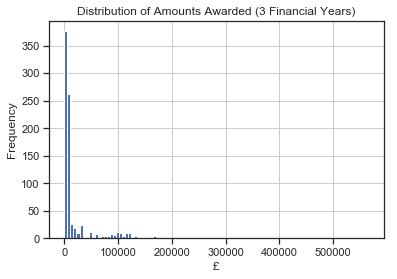

In [221]:
hist_3_FY = UK_data_merged_3FY_cut ['Amount_Awarded'].hist(bins=100)
plt.title("Distribution of Amounts Awarded (3 Financial Years)")
plt.xlabel("£")
plt.ylabel("Frequency")

In [212]:
Over_60K = UK_data_merged_3FY_cut.loc[UK_data_merged_3FY_cut['Amount_Awarded'] > 60000]

In [213]:
Over_60K.shape

(126, 63)

### Amounts Awarded by Financial Year (n= 866)

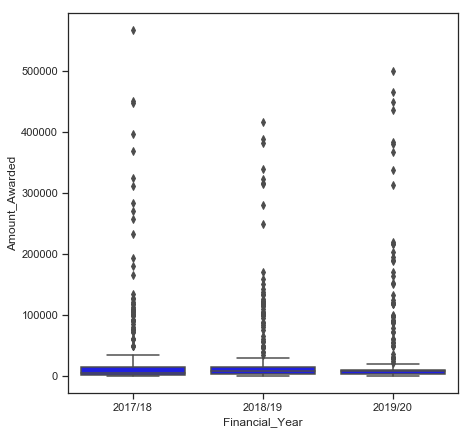

In [222]:
plt.figure(figsize=(7,7))
sn.boxplot(
    data=UK_data_merged_3FY_cut,
    x='Financial_Year',
    y='Amount_Awarded',
    color='blue')

In [229]:
#identify size of less than £15k
less_than_15k = UK_data_merged_3FY_cut.loc[UK_data_merged_3FY_cut['Amount_Awarded'] <15000]
less_than_15k.shape

(652, 63)

In [230]:
#identify size of more than £60k
more_than_60k = UK_data_merged_3FY_cut.loc[UK_data_merged_3FY_cut['Amount_Awarded'] >60000]
more_than_60k.shape

(126, 63)

In [239]:
UK_data_merged_3FY_cut ['Planned_Dates_Duration_(months)'] = UK_data_merged_3FY_cut ['Planned_Dates_Duration_(months)'].astype(float)


In [240]:
UK_data_merged_3FY_cut.describe()

,Amount_Awarded,Planned_Dates_Duration_(months)
count,866.000000,554.000000
mean,32604.683591,17.767148
std,73502.665426,13.043186
min,100.000000,0.000000
25%,2821.030000,11.000000
50%,7979.500000,12.000000
75%,14278.500000,32.250000
max,566160.000000,60.000000


### Amounts Awarded by Financial Year (n= 866)

Replotting the box plot to look at the distributions of amounts awarded by financial year. Recall that a box plot helps show comparisons between variables or across levels of a categorical variable - in this case financial year. The main body of the box plot showing the quartiles (25th and 75th percentile). The medians have horizontal lines at the median of each box and while whiskers have the vertical lines extending to the most extreme, non-outlier data points and caps are the horizontal lines at the ends of the whiskers.
Outliers are defined as points that lie 1.5 times the interquartile range past the quartlies.

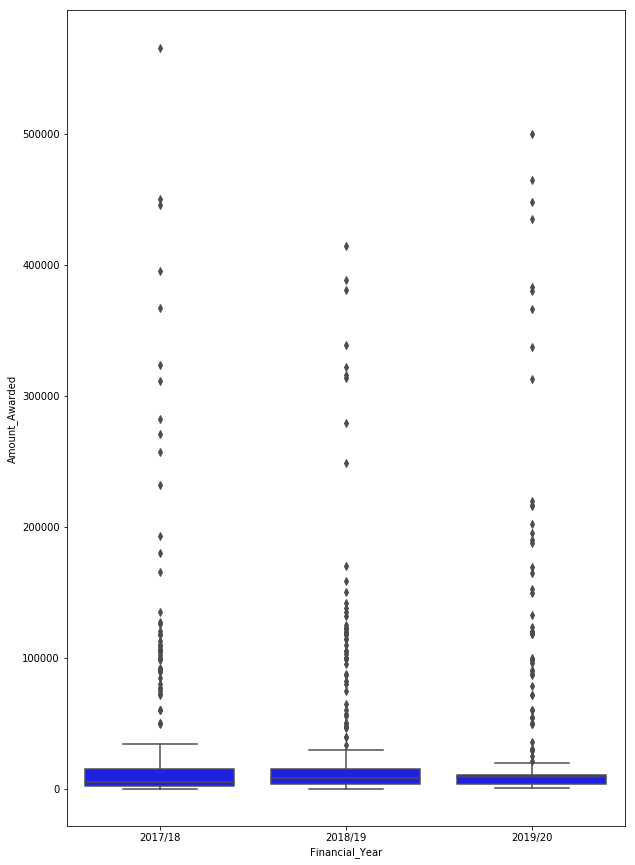

In [215]:
plt.figure(figsize=(10,15))
sn.boxplot(
    data=UK_data_merged_3FY_cut,
    x='Financial_Year',
    y='Amount_Awarded',
    color='blue')

The revised box plot suggests that there are still a large number outlier awards - the distributions are very skewed and median values are hard to read on the plot.
#Talk : replot and lose more outliers.....?

In [223]:
#Let's look at descriptive stats for the grouped data
UK_data_merged_3FY_cut['Amount_Awarded'].groupby(UK_data_merged_3FY_cut['Financial_Year']).describe()

,count,mean,std,min,25%,50%,75%,max
Financial_Year,,,,,,,,
2017/18,311.0,31276.250579,73123.413360,100.0,2040.2,5000.000,15391.00,566160.0
2018/19,269.0,32675.137993,67523.062049,100.0,3500.0,8737.000,15000.00,415002.0
2019/20,286.0,33982.971818,79310.665310,360.0,4000.0,8998.395,10552.75,500000.0


In [227]:
#UK_data_ex['Amount_Awarded'].groupby(UK_data_ex['Funding_Org_Name']).describe()

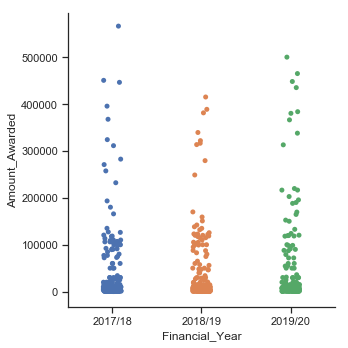

In [226]:
#Let's bring Funder in?
sn.set(style="ticks")

g = sn.catplot(x="Financial_Year", y="Amount_Awarded", data=UK_data_merged_3FY_cut)



In [82]:
UK_data_ex.to_csv ('C:/Users/sonja/Desktop/Life_Admin/Bereavement_Services/UK_data_ex.csv', 
                  index = False, header=True)

In [79]:
#data['Funding_Org_Name'].value_counts().head(70).plot(
 #   kind='barh', figsize = (20,60))

In [76]:
#data['Funding_Org_Name'].value_counts()

In [77]:
#data['Recipient_Org_Name'].value_counts().head(400).plot(
   # kind='barh', figsize=(30,300))

### Which Funders gave the largest grants (on average?)

In [80]:
#group_by_funder = data.groupby('Funding_Org_Name')
#We're grouping the data by funder
#and then the mean amount awarded 
#print (group_by_funder['Amount_Awarded'].agg(np.mean))#.sort_values(by = 'ascending')
#print (group_by_funder['Amount_Awarded'].agg([np.sum, np.size, np.mean, np.std]))

In [18]:
#Where next:
#1) Find out which funders started contributing to 360G when? 

####Working with entire dataset ( n = 1139)
# 2)# Add a new column for the financial year; set condition based on Award
#Date column to arrive at financial year entry  - DONE
#3) Look at how a) Numbers of Awards and b) Amounts awarded change by FY - DONE

#### Working with the subset of data for which we have planned duration (n = 943)
#4) Look at distribution of planned duration
### - a) do this for the whole dataset
    ### - hist, box & whiskers & swarm plot?
### - b) do this for the different financial years
##### - need something that captures and shows dbn.

### Work with the subset of the data for which we have recipient district (n=693)
 #- will have a look. not sure what we would be able to conclude.
    

In [81]:
#IGNORE
#df[df['var1'].str[0] == 'A']
#https://www.listendata.com/2019/07/how-to-filter-pandas-dataframe.html
#England = data[data['Recipient_District_Geographic_Code'].str[0]=="E"]
#England.shape
#nulls are homeless currently